<center>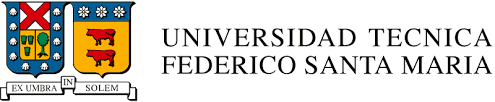</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Integrantes**
* Matías Vargas (Rol 201973036-3)
* Diego Saa (Rol 201973068-1)
* Bruno Liberona (Rol 201973013-4)

**Temas**
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales

<!-- **Formalidades**
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán.
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.

<hr style="height:2px;border:none"/> -->

# 0. Librerías necesarias.

Librerías a importar para explorar el conjunto de datos y aplicar los modelos de aprendizaje.

In [1]:
import numpy as np
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import os
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
import random
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from sklearn.ensemble import AdaBoostClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#random.seed(0)

# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Primero, se cargarán los datos al Colab con la ayuda de la Api de Kaggle. Para esto, importaremos nuestras Api credentials personales, pudiendo así descargar y descomprimir el dataset en nuestro repositorio virtual.

1) Localizar y subir la api-key de kaggle (kaggle.json):

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brunoliberona","key":"a4ebb42179ade3b5e11e6d8fba257374"}'}

2) Otorgar permisos de lectura y escritura al archivo kaggle.json:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

3) Descargar el dataset:

In [4]:
!kaggle datasets download -d rajyellow46/wine-quality

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 102MB/s]


4) Descomprimir:

In [5]:
!unzip /content/wine-quality.zip

Archive:  /content/wine-quality.zip
  inflating: winequalityN.csv        


5) Almacenar el dataset en memoria con la ayuda de un Pandas dataframe:

In [6]:
df = pd.read_csv('winequalityN.csv')

### 1.1.1 Exploración del conjunto de datos

Ya con el conjunto de datos almacenado en memoria, realizaremos un análisis de los datos a través de la exploración de este. Con esto, responderemos las siguientes preguntas:

a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> Analizaremos el dataset a través de la siguiente tabla resumen, fijandonos especialmente en el tipo de dato de cada una de las variables.

In [ ]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps

datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> Las variables númericas son:

* fixed acidity.
* volatile acidity.
* citric acid.
* residual sugar.
* chlorides.
* free sulfur dioxide.
* total sulfur dioxide.
* density.
* pH.
* sulphates.
* alcohol.
* quality.

> Esto debido a que sus variables poseen tipos de datos numéricos (enteros y flotantes de 64 bits).

> Por otro lados, las variables categóricas son:
* type.

> Esto debido a que corresponden a un tipo de dato el cual se representa a través de texto, poseyendo valores categóricos.

b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?

> Para obtener los atributos con datos faltantes se puede observar la columna _NaN_Values_. En base a lo anterior, los atributos con su respectiva cantidad de datos faltantes, son los siguientes:
* fixed acidity: 10.
* volatile acidity: 8.
* citric acid: 3.
* residual sugar: 2.
* chlorides: 2.
* pH: 9.
* sulphates: 4.

### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando esto, responderemos las siguientes preguntas:

a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo.

> Para los histogramas, podemos utilizar el método hist del dataframe de pandas. Este entrega un histograma para cada una de las variables presentes en el dataset.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

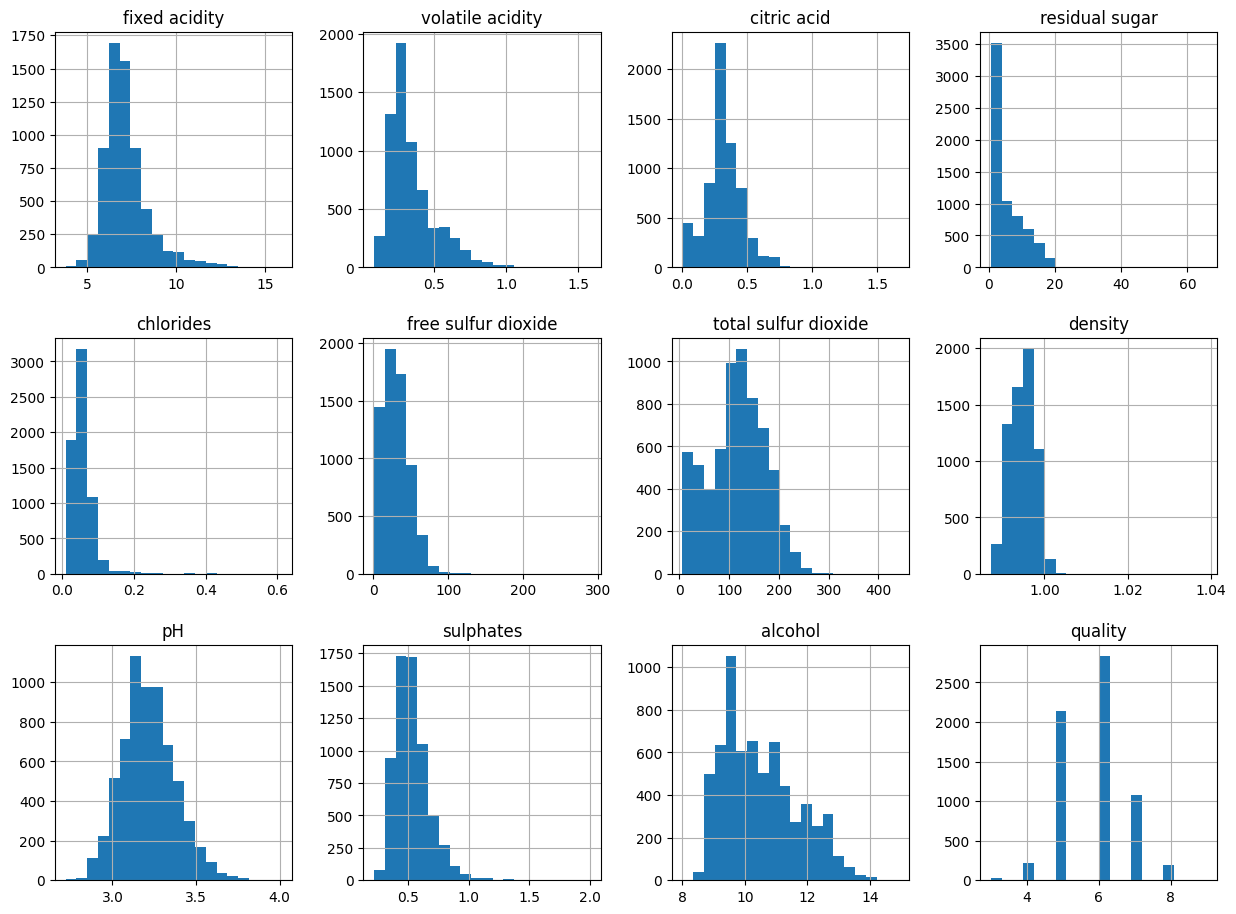

In [ ]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

>

> Para los box plots, se puede utilizar el método plot con el atributo kind='box'. Esto nos facilitará con un box plot para cada una de las variables, de la misma forma que con los histogramas.

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

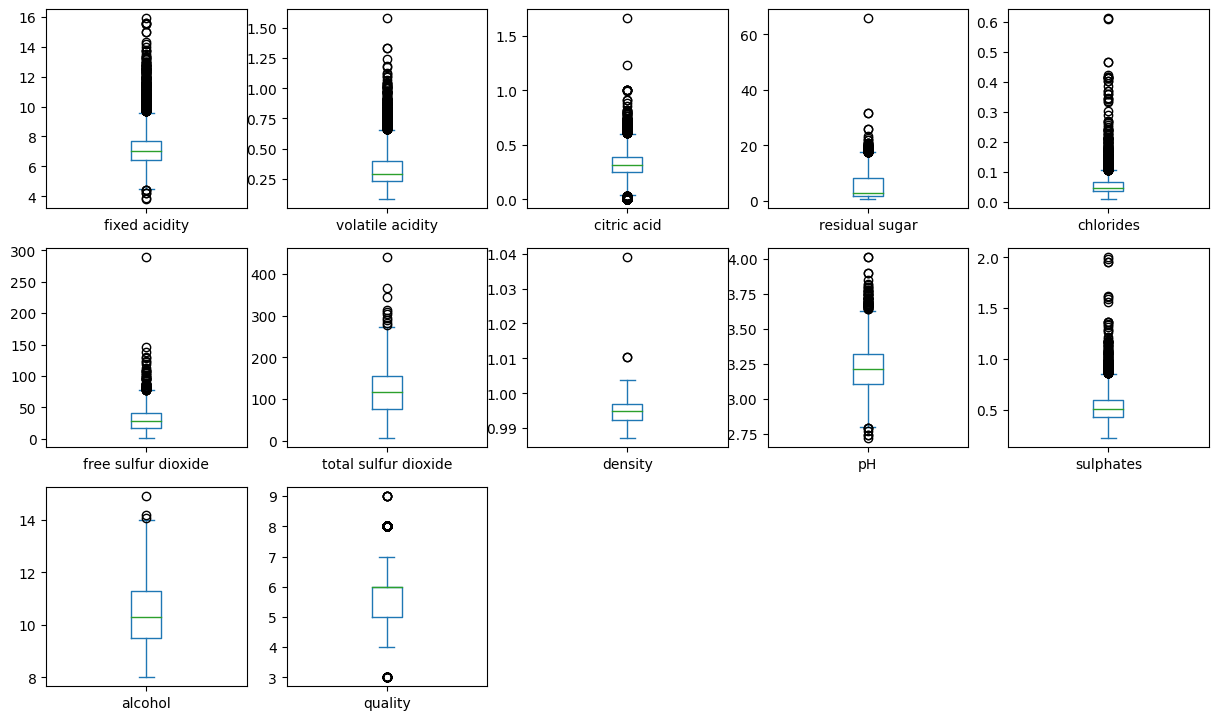

In [ ]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

> En estos dos conjuntos de gráficos se puede ver que se omitió la variable type por su naturaleza categórica. Para analizar su distribución, crearemos un gráfico de barras solo para esta variable.

<BarContainer object of 2 artists>

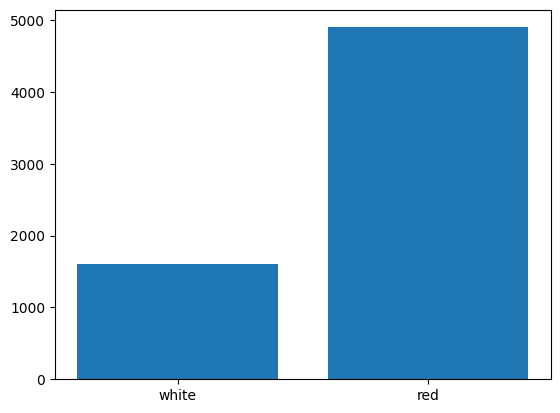

In [ ]:
plt.bar(df["type"].unique(), df.groupby("type")["quality"].count())

> De las distribuciones graficadas se puede concluir de que en ninguna variable sus valores están balanceados. En la mayoría de estas se puede notar de que los valores siguen una especie de distribución centrada. Otra cosa a destacar es la naturaleza continua de las variables numéricas que definimos anteriormente, pues las barras de los histogramas están bastante juntas en estos gráficos. Para la variable quality, podemos ver que esto último no se cumple, esto debido a que la variable presentaba valores de tipo enteros, y además estos existen en un rango bastante acotado (del 1 al 10). Con el histograma de esta variable también se puede ver que está bastante desbalanceada. Se observa una gran cantidad de datos en el rango 5-7, pero estos disminuyen considerablemente una vez se pasa a valores más pequeños o más grandes.

> En cuanto a los box plots, se puede notar que existe un alto número de outliers para casi todas las variables, exceptuando a "alcohol", "density" y "quality". Esto puede llegar a tener consecuencias dentro del entrenamiento de nuestros modelos, aunque no es algo que debieramos preocuparnos tan temprano en el análisis de estos datos.

b) ¿Considera que están *balanceados* los valores de la variable objetivo?

> Al visualizar los gráficos de "quality" se puede apreciar que las valores estan desbalanceadas. Para verlo con más detalle, generaremos la siguiente tabla:

In [ ]:
ax = df['quality'].value_counts()
print(ax)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


> Como se puede ver, la variable 6 es la mayor con 2836 datos, siendo significativamente superior a las otras, de hecho la que tiene una menor cantidad es la variable 9 con tan solo 5 datos. Incluso, hay valores de esta variable que ni siquiera tienen valores presentes en el dataset. Recordemos de que esta variable representa una puntuación, por lo que sus valores de esta variable debiesen ir del 0 al 10 y, como podemos ver, los valores "0", "1", "2" y "10" no están presentes. Esto último puede significar problemas de generalización de los modelos que sean probados con data que contenga estos valores.

c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?

> Se puede producir overfitting, debido a que el modelo se sesga con la clase que tiene una mayor cantidad de datos y esto produce que el modelo no sea capaz de clasificar datos de las clases minoritarias. Por otra parte, las métricas como el accuracy se vuelven poco confiables, ya que puede entregar un alto valor, aunque todas las clases minoritarias fueran mal clasificadas.

### 1.1.3 Separación de conjuntos

a) Separe el conjunto entre variables características y variable objetivo.

> Primero, aplicaremos la función get_dummies a nuestro dataset, con tal de aplicar one hot encoding a nuestra variable categórica "type". Esta función la llamaremos con el atributo drop_first=True, pues al ser una variable binaria ("white" o "red"), teniendo una columna booleana ya es suficiente con tal de modelar los distintos valores de la variable original. Esta variable "type" pasará a ser "type_white" con esta transformación.

In [7]:
df = pd.get_dummies(df, drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


> Ahora, separaremos el dataset de la siguiente manera:

In [8]:
X = df.drop(['quality'], axis=1)

In [9]:
y = df['quality']

b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> Para esto se utiliza la función train_test_split con los conjuntos obtenidos anteriormente. Se le indica un test_size de 0.2 con tal de obtener el 20% de los datos en el conjunto de prueba:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

> Devolviéndonos a la tabla resumen generada en 1.1.1.a, las variables del dataset que poseían un porcentaje no nulo de valores nulos eran "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "ph" y "sulphates". Para rellenar estos valores nulos con la media de cada una de las variables, utilizaremos el método fillna de pandas.

In [11]:
# Promedios de las features
X_train_mean_f1 = X_train['fixed acidity'].mean()
X_train_mean_f2 = X_train['volatile acidity'].mean()
X_train_mean_f3 = X_train['citric acid'].mean()
X_train_mean_f4 = X_train['residual sugar'].mean()
X_train_mean_f5 = X_train['chlorides'].mean()
X_train_mean_f6 = X_train['pH'].mean()
X_train_mean_f7 = X_train['sulphates'].mean()

# Campos faltantes del conjunto de entrenamiento, se rellenan con promedio de entrenamiento
X_train['fixed acidity'] = X_train['fixed acidity'].fillna(X_train_mean_f1)
X_train['volatile acidity'] = X_train['volatile acidity'].fillna(X_train_mean_f2)
X_train['citric acid'] = X_train['citric acid'].fillna(X_train_mean_f3)
X_train['residual sugar'] = X_train['residual sugar'].fillna(X_train_mean_f4)
X_train['chlorides'] = X_train['chlorides'].fillna(X_train_mean_f5)
X_train['pH'] = X_train['pH'].fillna(X_train_mean_f6)
X_train['sulphates'] = X_train['sulphates'].fillna(X_train_mean_f7)

# Campos faltantes del conjunto de test, se rellenan con promedio de entrenamiento
X_test['fixed acidity'] = X_test['fixed acidity'].fillna(X_train_mean_f1)
X_test['volatile acidity'] = X_test['volatile acidity'].fillna(X_train_mean_f2)
X_test['citric acid'] = X_test['citric acid'].fillna(X_train_mean_f3)
X_test['residual sugar'] = X_test['residual sugar'].fillna(X_train_mean_f4)
X_test['chlorides'] = X_test['chlorides'].fillna(X_train_mean_f5)
X_test['pH'] = X_test['pH'].fillna(X_train_mean_f6)
X_test['sulphates'] = X_test['sulphates'].fillna(X_train_mean_f7)


d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

> Para esta estandarización consideraremos a todas las variables menos "type". Para aplicarla utilizaremos la transformación standardScaler, haciendo un fit distinto para los features de entrenamiento y los features de prueba.

In [12]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

> Para esto se utilizará la función mutual_info_regression, pues consideramos el target como una variable continua.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Mutual information between predictors and target')

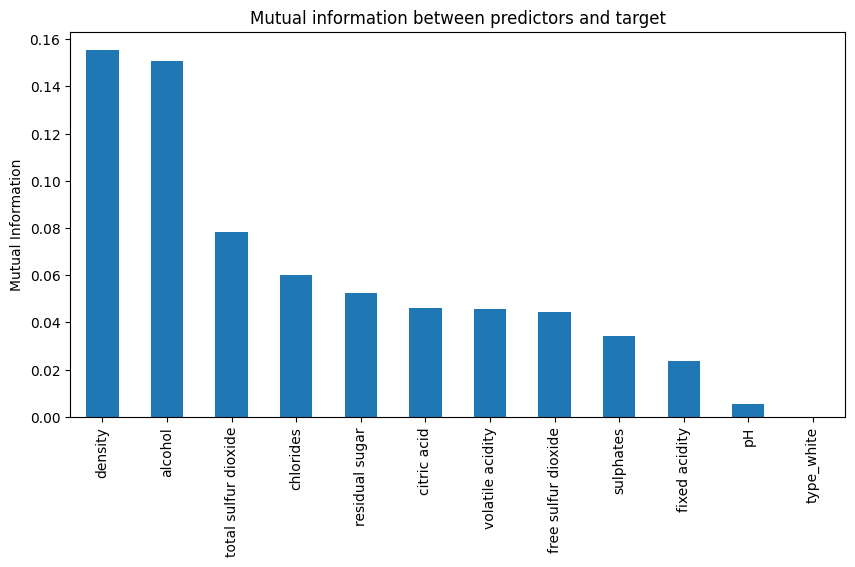

In [14]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)

mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

> Como se puede ver, las variables "alcohol" y "density" son las que poseen una relevancia mayor con nuestro target, mientras que las variables "pH", "fixed acidity" y "type_white" las que poseen una menor relevancia, esto en base de la información mutua de estas variables con la calidad del vino.

f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

> Para esto se utilizará el conjunto $\textit{A}$ como el que contiene todas las variables y $\textit{B}$ al nuevo conjunto con variables reducidas. Este último lo confeccionaremos a través de 3 conjuntos distintos, probando con quitar k = 1, 3 o 5 variables. De esta manera, se probará cada uno de estos conjuntos $\textit{B}$ en los modelos que estudiaremos, quedándonos con el mejor para definir a $\textit{B}$ en casa caso. Para realizar esta selección se utilizará el siguiente código (el cual fue el que se utilizó en la tarea 1 para generar conjuntos similares), el cual hace uso del arreglo $\textit{mi}$ obtenido anteriormente para ordenar las variables según su información mutua.

In [15]:
# Setear conjunto A
A = (X_train, y_train, X_test, y_test)

# Se crean 3 conjuntos B con distintos k
k = 1, 3, 5
X_train_mi = []
X_test_mi = []

for i in k:
  # Número de features a elegir
  n = len(mi) - i

  # Sort de los features respecto a su mi score
  sorted_indices = np.argsort(mi)

  # Se eligen las mejores n
  selected_indices = sorted_indices[-n:]

  # Se eliminan las peores features y se mantienen las mejores n
  no_selected_indices = (sorted_indices[:-n]).tolist()
  X_train_new = X_train.drop(X_train.columns[no_selected_indices], axis=1)
  X_test_new = X_test.drop(X_test.columns[no_selected_indices], axis=1)
  print("\nIteración k =",i,"\n\n",X_test_new.head())
  X_train_mi.append(X_train_new)
  X_test_mi.append(X_test_new)


Iteración k = 1 

       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4030      -0.253645         -0.910391     0.406542       -0.906402  -0.921468   
604       -0.713272         -0.484574     1.155932       -0.833050  -0.118539   
206       -0.177041         -1.092885    -0.002216        0.592083  -0.312350   
6251       0.282586          1.857422    -1.977880       -0.749218   0.822826   
1314      -0.636668         -0.180419     0.542795        0.151968  -0.450786   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4030            -0.029866             -0.184435 -1.422162 -0.673235   
604              0.194350              0.324873 -0.779060 -1.423150   
206              0.418566              0.184374  0.353866 -0.048306   
6251            -0.926729             -1.027428  0.720401  0.951580   
1314             0.866997              0.939555  0.187259 -0.423263   

      sulphates   alcohol  
4030  -1.015391  0.768485  
604    0.5

## 1.2 Modelos de Regresión

En la siguiente sección entrenamos, validaremos y evaluaremos distintos modelos utilizando los conjuntos $A$ y $B$ por separado, para luego realizar respectivas comparaciones entre ambos. De esta forma, se tendrá que ajustar cada hiperparámetro de cada modelo a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba.

Los hiperparámetros de los modelos se variarán utilizando la siguiente función:

`GridSearchCV(estimator, param_grid, scoring=mean_squared_error, refit=True)`

En donde "estimator" es el modelo a utilizar, "scoring" es la métrica para evaluar el modelo y "refit=True" se utilizará para escoger el mejor modelo una vez probado todo el subconjunto del espacio de hipótesis, entrenándolo con todo el conjunto de entrenamiento.

### 1.2.1 Árbol de regresión

En esta sección se entrenará un árbol de regresión, variando los siguientes parámetros con la utilización del GridSearchCV ya mencionado, y manteniendo fijos los no mencionados:

> a) max_depth: Probaremos con los valores 2, 20 y 200 para este parámetro. Este sirve para definir la profundidad máxima que tendrá el árbol, es decir, hasta cuantos niveles se debe expandir. En caso de ser None, el árbol se expande hasta que todas las hojas sean nodos puros o hasta que todas contengan menos que el parámetro min_samples_split.

> b) max_leaf_nodes: Probaremos con los valores 10, 50 y 100. Este parámetro indica el número máximo de nodos hojas/terminales permitidos para el árbol.

Ya con esto definido, entrenaremos el modelo con los conjuntos $A$ y $B$ previamente mencionados. Para este modelo, utilizaremos el método DecissionTreeRegressor, el cual nos permite construir un árbol de regresión con nuestros conjuntos de datos. El param_grid con el que ejecutaremos el GridSearchCV se construirá con los parámetros a variar ya mencionados, "max_depth" y "max_leaf_nodes". Generaremos además un kfold con k igual a 5 para el tuning. Por último, se utilizará como medida de scoring a neg_mean_squared_error.

In [16]:
k = 5
cv_folds = KFold(n_splits=k, shuffle=True)
param_grid = {'max_depth': [2, 20, 200],
              'max_leaf_nodes': [10, 50, 100]}

- Árbol de Regresión con conjunto $A$:

In [17]:
(X_train, y_train, X_test, y_test) = A
model1 = DecisionTreeRegressor()
hypereg1 = GridSearchCV(model1,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0
            )

hypereg1.fit(X_train, y_train)
pd.DataFrame(hypereg1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006485,0.001305,0.001200,0.000245,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.779480,-0.819311,-0.751427,-0.752760,-0.733764,-0.767348,0.029804,7
1,0.005751,0.000033,0.001048,0.000015,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.779480,-0.819311,-0.751427,-0.752760,-0.733764,-0.767348,0.029804,9
2,0.005754,0.000052,0.001050,0.000013,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.779480,-0.819311,-0.751427,-0.752760,-0.733764,-0.767348,0.029804,7
3,0.010382,0.000315,0.001112,0.000095,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.759871,-0.785880,-0.720987,-0.719122,-0.703118,-0.737795,0.030441,5
4,0.016586,0.000330,0.001561,0.000125,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.703620,-0.779778,-0.704127,-0.682061,-0.673498,-0.708617,0.037543,1
5,0.018900,0.000349,0.001319,0.000179,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.725344,-0.821061,-0.690780,-0.706038,-0.684133,-0.725471,0.049855,4
6,0.010231,0.000201,0.001055,0.000019,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.759871,-0.785880,-0.720987,-0.719122,-0.703118,-0.737795,0.030441,6
7,0.016910,0.000486,0.001168,0.000043,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.703620,-0.779778,-0.704127,-0.703642,-0.673498,-0.712933,0.035423,2
8,0.019442,0.000670,0.001252,0.000052,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.725344,-0.812114,-0.690780,-0.706038,-0.684133,-0.723682,0.046435,3


In [18]:
y_pred_1 = hypereg1.predict(X_test)
y_pred_1 = y_scaler.inverse_transform(y_pred_1.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred_1))

0.5819731120708547


- Conjunto $B$ con $k=1$:

In [19]:
B = (X_train_mi[0], y_train, X_test_mi[0], y_test)

(X_train_new_1, y_train, X_test_new_1, y_test) = B
hypereg1 = GridSearchCV(model1,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg1.fit(X_train_new_1, y_train)
pd.DataFrame(hypereg1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006565,0.001372,0.001092,0.000147,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.749550,-0.720245,-0.803995,-0.761635,-0.811298,-0.769345,0.034126,7
1,0.005607,0.000141,0.000947,0.000006,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.749550,-0.720245,-0.803995,-0.761635,-0.811298,-0.769345,0.034126,7
2,0.005555,0.000085,0.000985,0.000083,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.749550,-0.720245,-0.803995,-0.761635,-0.811298,-0.769345,0.034126,9
3,0.010133,0.000096,0.001041,0.000104,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.719959,-0.682612,-0.758747,-0.743841,-0.797954,-0.740623,0.038517,5
4,0.016311,0.000212,0.001055,0.000033,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.683820,-0.668442,-0.728208,-0.684651,-0.715512,-0.696127,0.022157,1
5,0.018997,0.000283,0.001059,0.000058,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.718244,-0.701315,-0.725401,-0.693310,-0.722662,-0.712186,0.012614,3
6,0.010223,0.000165,0.001014,0.000041,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.719959,-0.682612,-0.758747,-0.743841,-0.797954,-0.740623,0.038517,5
7,0.016965,0.000826,0.001187,0.000245,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.683820,-0.668442,-0.728208,-0.684651,-0.725405,-0.698105,0.024151,2
8,0.019228,0.000891,0.001101,0.000127,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.718244,-0.701315,-0.726657,-0.689981,-0.752283,-0.717696,0.021509,4


In [20]:
y_pred_1 = hypereg1.predict(X_test_new_1)
y_pred_1 = y_scaler.inverse_transform(y_pred_1.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred_1))

0.5819731120708546


- Conjunto $B$ con $k = 3$:

In [21]:
B = (X_train_mi[1], y_train, X_test_mi[1], y_test)

(X_train_new_2, y_train, X_test_new_2, y_test) = B
hypereg2 = GridSearchCV(model1,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg2.fit(X_train_new_2, y_train)
pd.DataFrame(hypereg2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005688,0.001537,0.001074,0.000205,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.812521,-0.754771,-0.732472,-0.751935,-0.768701,-0.764080,0.026837,7
1,0.004778,0.000020,0.000942,0.000033,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.812521,-0.754771,-0.732472,-0.751935,-0.768701,-0.764080,0.026837,7
2,0.004823,0.000052,0.000952,0.000025,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.812521,-0.754771,-0.732472,-0.751935,-0.768701,-0.764080,0.026837,7
3,0.008623,0.000099,0.000959,0.000019,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.773812,-0.714300,-0.721300,-0.716121,-0.751512,-0.735409,0.023456,5
4,0.013578,0.000505,0.001065,0.000172,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.718788,-0.663340,-0.690339,-0.675370,-0.680265,-0.685620,0.018722,1
5,0.015384,0.000182,0.000993,0.000015,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.721367,-0.671868,-0.757598,-0.715639,-0.686184,-0.710531,0.029821,4
6,0.008589,0.000182,0.000970,0.000025,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.773812,-0.714300,-0.721300,-0.716121,-0.751512,-0.735409,0.023456,5
7,0.013741,0.000570,0.001066,0.000165,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.718788,-0.663340,-0.690339,-0.675370,-0.680265,-0.685620,0.018722,1
8,0.015574,0.000265,0.001011,0.000011,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.721367,-0.671868,-0.757598,-0.715639,-0.676399,-0.708574,0.031621,3


In [22]:
y_pred_2 = hypereg2.predict(X_test_new_2)
y_pred_2 = y_scaler.inverse_transform(y_pred_2.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred_2))

0.5588756033341382


- Conjunto $B$ con $k = 5$:

In [23]:
B = (X_train_mi[2], y_train, X_test_mi[2], y_test)

(X_train_new_5, y_train, X_test_new_5, y_test) = B
hypereg5 = GridSearchCV(model1,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg5.fit(X_train_new_5, y_train)
pd.DataFrame(hypereg5.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004683,0.000816,0.001073,0.000186,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.808039,-0.762985,-0.727486,-0.775708,-0.769864,-0.768816,0.025804,5
1,0.004132,0.000079,0.000934,0.000021,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.808039,-0.762985,-0.727486,-0.775708,-0.769864,-0.768816,0.025804,6
2,0.004057,0.000012,0.000915,0.000021,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.808039,-0.762985,-0.727486,-0.775708,-0.769864,-0.768816,0.025804,6
3,0.007614,0.001050,0.000943,0.000034,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.791258,-0.710571,-0.693570,-0.744822,-0.726478,-0.733340,0.033566,2
4,0.011096,0.000772,0.000970,0.000018,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.836244,-0.710666,-0.690548,-0.750560,-0.725833,-0.742770,0.050681,3
5,0.012891,0.000476,0.001036,0.000026,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.866339,-0.715443,-0.744427,-0.776550,-0.790553,-0.778663,0.050994,9
6,0.007050,0.000185,0.000940,0.000010,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.791258,-0.710571,-0.693570,-0.744822,-0.726478,-0.733340,0.033566,1
7,0.011071,0.000369,0.001068,0.000189,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.836244,-0.710666,-0.690548,-0.750560,-0.725833,-0.742770,0.050681,3
8,0.013502,0.000866,0.001143,0.000137,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.835444,-0.716243,-0.760374,-0.776550,-0.789017,-0.775526,0.038775,8


In [24]:
y_pred_3 = hypereg5.predict(X_test_new_5)
y_pred_3 = y_scaler.inverse_transform(y_pred_3.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred_3))

0.606453057434742


Como se puede notar, obtuvimos un mejor resultado con el modelo $B$ que considera $k=3$ features menos. Debido a esto y a modo de simplificación, utilizaremos únicamente este $B$ para los otros modelos.

In [29]:
B = (X_train_mi[1], y_train, X_test_mi[1], y_test)

Ya con esto, responderemos las siguientes preguntas:

c) ¿Cuántos modelos de árboles de regresión le quedan en total?

> Quedan 9 modelos de árboles para $A$ y 9 modelos para $B$, que son las combinaciones entre los parámetros _max_depth_ y _max_leaf_nodes_ en cada uno de los casos.

d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

>* Como se puede observar en la tabla, para el modelo $A$ los mejores parámetros son max_depth: 20 y max_leaf_nodes: 50.
>* Para el modelo $B$ se puede apreciar en la tabla, que los mejores parámetros son con max_depth: 20 y  max_leaf_nodes: 50.

c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

> Para el modelo $A$ el _mean\_squared\_error_ es 0.5819731120708547, mientras que para el modelo $B$ es de 0.5588756033341382. En base a estos resultados, seleccionamos el modelo $B$ que hace uso de la representacion con $k=3$ menos features, obteniendo un error menor.

### 1.2.2 Random Forest Regressor

En esta sección se entrenará un bosque aleatorio de regresión manteniendo fijos por defecto los parámetros que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv ya mencionado y utlizado en la sección anterior.

> max_depth: Se probará con las profundidades 2, 20, 200. Este parámetro sirve para definir la profundidad máxima que tendrá el árbol, es decir, hasta cuantos niveles se debe expandir. En caso de ser none, el árbol se expande hasta que todas las hojas sean nodos puros o hasta que todas contengan menos que el parámetro min_samples_split.

> max_samples: Se probará con las siguientes proporciones 0.1, 0.5, 1.0.
>Es la cantidad máxima de muestras que se extraeran del conjunto X para entrenar cada estimador base.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responderemos las siguientes preguntas:

a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

> Son modelos de aprendizajes ensamblados que se basan en la idea de combinar multiples modelos para obtener mejores resultados en la predicción utilizando diferentes técnicas.

> Se diferencian en que el primer método es paralelo, en donde se crean n modelos y cada uno es entrenado en base al conjunto de entrenamiento de forma independiente, posteriormente estos modelos combinan sus resultados promediandolos y así obtener el resultado final.

> Por otra parte, el segundo método es secuencial, en donde se crean n modelos considerando los resultados de los modelos previos, esto es posible debido a que cada dato tienen un peso asociado, que va aumentando de valor si el modelo previo lo mal clasifico, de forma que el siguiente modelo lo intente corregir.


b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

> Random Forest pertenece a $averaging$, ya que se entrenan n modelos en forma paralela e independiente, para luego unir sus resultados mediante votación o promedio y así obtener un resultado final.

Ahora, se entrenará el modelo utilizando la función RandomForestRegressor y aplicando GridSearchCV para tunear los hiperparámetros ya definidos. Recordemos de que utilizaremos los modelos $A$ y $B$ (con $k=3$).

- Conjunto $A$:

In [30]:
(X_train, y_train, X_test, y_test) = A

param_grid = {'max_depth': [2, 20, 200],
              'max_samples': [0.1, 0.5, 1.0]}

model2 = RandomForestRegressor(random_state=0)
hypereg = GridSearchCV(model2,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg.fit(X_train, y_train.ravel())
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.138391,0.005314,0.008234,0.000518,2,0.1,"{'max_depth': 2, 'max_samples': 0.1}",-0.650545,-0.750325,-0.760249,-0.743118,-0.751673,-0.731182,0.040684,7
1,0.272150,0.004557,0.007796,0.000084,2,0.5,"{'max_depth': 2, 'max_samples': 0.5}",-0.658543,-0.767835,-0.772837,-0.755345,-0.759237,-0.742759,0.042558,8
2,0.378090,0.000868,0.007566,0.000116,2,1.0,"{'max_depth': 2, 'max_samples': 1.0}",-0.665691,-0.775961,-0.780594,-0.759955,-0.762518,-0.748944,0.042351,9
3,0.297771,0.002490,0.013555,0.000176,20,0.1,"{'max_depth': 20, 'max_samples': 0.1}",-0.547635,-0.624280,-0.631192,-0.625485,-0.643370,-0.614392,0.034057,5
4,1.224788,0.076549,0.018585,0.001187,20,0.5,"{'max_depth': 20, 'max_samples': 0.5}",-0.464803,-0.564727,-0.560400,-0.542797,-0.557743,-0.538094,0.037381,4
5,1.985515,0.069361,0.021005,0.001710,20,1.0,"{'max_depth': 20, 'max_samples': 1.0}",-0.452834,-0.534566,-0.520684,-0.520114,-0.533058,-0.512251,0.030312,2
6,0.298446,0.004274,0.014051,0.000830,200,0.1,"{'max_depth': 200, 'max_samples': 0.1}",-0.547446,-0.624194,-0.631513,-0.625349,-0.643805,-0.614461,0.034223,6
7,1.250787,0.074850,0.019825,0.002589,200,0.5,"{'max_depth': 200, 'max_samples': 0.5}",-0.464971,-0.564131,-0.560925,-0.541929,-0.556817,-0.537755,0.037177,3
8,1.933310,0.005635,0.021130,0.002223,200,1.0,"{'max_depth': 200, 'max_samples': 1.0}",-0.450055,-0.534083,-0.519371,-0.515739,-0.530564,-0.509962,0.030715,1


In [31]:
y_pred = hypereg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.4037566923076923


- Conjunto $B$:

In [32]:
(X_train_B, y_train, X_test_B, y_test) = B

param_grid = {'max_depth': [2, 20, 200],
              'max_samples': [0.1, 0.5, 1.0]}

model2 = RandomForestRegressor(random_state=0)
hypereg = GridSearchCV(model2,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg.fit(X_train_B, y_train.ravel())
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126852,0.003986,0.008152,0.000395,2,0.1,"{'max_depth': 2, 'max_samples': 0.1}",-0.702360,-0.734855,-0.779704,-0.718983,-0.720354,-0.731251,0.026324,7
1,0.243747,0.005336,0.008080,0.000897,2,0.5,"{'max_depth': 2, 'max_samples': 0.5}",-0.711641,-0.739644,-0.796750,-0.731064,-0.732375,-0.742295,0.028763,8
2,0.337081,0.006237,0.007467,0.000254,2,1.0,"{'max_depth': 2, 'max_samples': 1.0}",-0.717945,-0.740639,-0.803186,-0.739363,-0.736420,-0.747511,0.029019,9
3,0.263509,0.002648,0.014790,0.001807,20,0.1,"{'max_depth': 20, 'max_samples': 0.1}",-0.584130,-0.619310,-0.648895,-0.606476,-0.611016,-0.613965,0.020993,6
4,1.029738,0.073915,0.018275,0.001306,20,0.5,"{'max_depth': 20, 'max_samples': 0.5}",-0.515518,-0.549185,-0.547226,-0.536757,-0.518389,-0.533415,0.014119,4
5,1.634593,0.093291,0.020012,0.000251,20,1.0,"{'max_depth': 20, 'max_samples': 1.0}",-0.488977,-0.516001,-0.524880,-0.507668,-0.501197,-0.507745,0.012304,2
6,0.260353,0.004267,0.013905,0.000565,200,0.1,"{'max_depth': 200, 'max_samples': 0.1}",-0.584028,-0.619202,-0.649300,-0.605951,-0.610918,-0.613880,0.021193,5
7,0.975042,0.005715,0.018049,0.000613,200,0.5,"{'max_depth': 200, 'max_samples': 0.5}",-0.513087,-0.547576,-0.547283,-0.537327,-0.517916,-0.532638,0.014551,3
8,1.636636,0.078378,0.021256,0.002317,200,1.0,"{'max_depth': 200, 'max_samples': 1.0}",-0.489266,-0.517946,-0.525104,-0.505198,-0.500240,-0.507551,0.012724,1


In [33]:
y_pred = hypereg.predict(X_test_B)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.4023526923076924


c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

> Para el modelo $A$, se obtienen como mejor modelo con max_depth=200 y max_samples=1.0. Con este, se obtiene un error cuadrático medio de 0.4037566923076923.

> Para el modelo $B$, se obtienen como mejor modelo con max_depth=200 y max_samples=1.0. Con este, se obtiene un error cuadrático medio de 0.4023526923076924.

> Como se puede observar, el mejor modelo fue $B$, pues tiene un error menor. Una cosa a destacar es que en ambos modelos se utilizó max_depth=200 y max_samples=1.0.

### 1.2.3 Bagging Regressor

Por último, se entrenará un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> n_estimators: Se probará con 10, 100, 1000 estimadores. Este representa el número de estimadores base o la cantidad de modelos que se entrenarán.

> max_samples: Se probará con las siguientes proporciones 0.1, 0.5, 1.0. Este representa el número de muestras a extraer de X para entrenar cada estimador base.

Además, se responderán las siguientes preguntas:

a) ¿Cómo funciona el modelo Bagging?

> En se crean n modelos "débiles" y cada uno es entrenado en base a un subconjunto (con muestreo aletorio y se pueden repetir datos) del conjunto de entrenamiento de forma independiente, posteriormente estos modelos combinan sus resultados (creando un modelo "fuerte") promediandolos o votando y así obtener el resultado final.

b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

>Bagging pertenece a la familia  $averaging$, a diferencia de este último utiliza subconjuntos aleatorios del conjunto de entrenamiento.

Ya con esto, se utilizá la función BaggingRegressor, en donde se le entrega en estimator el mejor modelo de DecisionTreeRegressor que se obtuvo en la sección 1.2.1, correspondiente al modelo $B$ con max_depth=20 y max_leaf_nodes=50. Este último parámetro indica el modelo base que se utilizará para entrenar todos los samples del ensamblador.

In [34]:
(X_train_B, y_train, X_test_B, y_test) = B

param_grid = {'n_estimators': [10, 100, 1000 ],
              'max_samples': [0.1, 0.5, 1.0]}

bestmodel = DecisionTreeRegressor(max_depth = 20 , max_leaf_nodes = 50)
model3 = BaggingRegressor(estimator = bestmodel)
hypereg = GridSearchCV(model3,
             param_grid,
             scoring='neg_mean_squared_error',
             refit=True,
             cv=cv_folds,
             verbose=0,
            )

hypereg.fit(X_train_B, y_train.ravel())
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027580,0.000626,0.002568,0.000088,0.1,10,"{'max_samples': 0.1, 'n_estimators': 10}",-0.689907,-0.660747,-0.690318,-0.628598,-0.684813,-0.670876,0.023767,9
1,0.260280,0.003147,0.013715,0.000232,0.1,100,"{'max_samples': 0.1, 'n_estimators': 100}",-0.640483,-0.625172,-0.663145,-0.584722,-0.626381,-0.627981,0.025591,6
2,2.594227,0.126085,0.125616,0.003922,0.1,1000,"{'max_samples': 0.1, 'n_estimators': 1000}",-0.637421,-0.622109,-0.663107,-0.579502,-0.628579,-0.626144,0.027170,5
3,0.066611,0.000931,0.002705,0.000073,0.5,10,"{'max_samples': 0.5, 'n_estimators': 10}",-0.664951,-0.634618,-0.689521,-0.592971,-0.637403,-0.643893,0.032393,8
4,0.650395,0.005707,0.013387,0.000351,0.5,100,"{'max_samples': 0.5, 'n_estimators': 100}",-0.635809,-0.612264,-0.655793,-0.576947,-0.627869,-0.621737,0.026425,2
5,6.578527,0.122469,0.119069,0.003486,0.5,1000,"{'max_samples': 0.5, 'n_estimators': 1000}",-0.633227,-0.612260,-0.656888,-0.572156,-0.628828,-0.620672,0.028144,1
6,0.097019,0.000960,0.002716,0.000020,1.0,10,"{'max_samples': 1.0, 'n_estimators': 10}",-0.645870,-0.624049,-0.678176,-0.585242,-0.648516,-0.636371,0.030827,7
7,0.980477,0.057252,0.014213,0.002357,1.0,100,"{'max_samples': 1.0, 'n_estimators': 100}",-0.636633,-0.610589,-0.660029,-0.576239,-0.628814,-0.622461,0.028035,3
8,9.539665,0.103187,0.126049,0.009293,1.0,1000,"{'max_samples': 1.0, 'n_estimators': 1000}",-0.637570,-0.613202,-0.659655,-0.575056,-0.632170,-0.623531,0.028401,4


In [35]:
y_pred = hypereg.predict(X_test_B)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print(mean_squared_error(y_test, y_pred))

0.5121328334229615


c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

> Como se puede observar en la tabla, el mejor modelo fue para los parámetros n_estimators: 1000 y max_samples: 0.5.

> Con este se obtuvo un error cuadrático medio igual a 0.5121328334229615.

## 1.3 Conclusiones

> En este ítem se aplicó el aprendizaje de 3 tipos de modelos de aprendizaje, aplicando a cada uno tuning para optimizar algunos de sus hiperparámetros y obteniendo dos modelos distintos para un modelo de entrenamiento/prueba $A$, con el split original de la data, y otro $B$, aplicando disminución de features $k=5$ en base a la Mutual Information de estos últimos con la variable target.

> Ya con la ejecución de cada uno de los modelos con sus variaciones respectivas, los errores cuadráticos medios (MSE) se pueden resumir en lo siguiente:

> - Árbol de regresión:
    - Modelo A: MSE = 0.5819731120708547, con max_depth = 20 y max_leaf_nodes = 50.
    - Modelo B: MSE = 0.5588756033341382, con max_depth = 20 y max_leaf_nodes = 50.
- Random Forest Regressor:    
    - Modelo A: MSE = 0.4037566923076923, con max_depth = 200 y max_samples = 1.0.
    - Modelo B: MSE = 0.4023526923076924, con max_depth = 200 y max_samples = 1.0.
- Bagging Regressor:
    - Modelo B: MSE = 0.5121328334229615, con modelo base Árbol de regresión con max_depth = 20, max_leaf_nodes = 50, n_estimatoris = 1000 y max_samples = 0.5.

> Observando los resultados, si bien las diferencias no son muy significativas, el modelo de random forest tiene un MSE menor que el modelo de árbol de regresión y bagging regresor. Esta mejora del error respecto a los otros modelos se puede explicar por la capacidad de Random Forest Regressor de samplear los features dentro de cada uno de los modelos que genera, lo que puede llegar a aumentar en gran medida la capacidad de generalizar del learner final.

> Al momento de utilizar feature selection no se obtuvo una mejora considerable en la disminución del MSE dentro de los casos analizados. De igual manera, se puede seguir probando posibles mejoras, como intentando con la eliminación de un número distinto de features, o utilizando otros métodos de feature selection.

> Por el lado de costo computacional, los tiempos de ejecución del tuning fue pequeño para todos los modelos, exceptuando por Bagging, que tardó un mayor tiempo de ejecucion en comparación de los dos otros modelos. Esto se explica debido a que Bagging utiliza todas las features en cada árbol a ensamblar por el modelo, a comparación de Random Forest por ejemplo que selecciona solo un sample de estos.

> Para encontrar mejores resultados en los modelos propuestos, se podrían incluir una mayor cantidad de paramétros o valores al realizar tunning. Por ejemplo, en random forest se podría incluir la cantidad máxima de features. Sin embargo, los resultados fueron bastante decentes, considerando de que el MSE obtenido en todos los casos estudiados fue menor a 1, lo que indica una buena capacidad para predecir la calidad de un vino sin caer en mucho error debido a la naturaleza de esta calificación en el dataset, pues estos originalmente eran valores discretos que íban de uno en uno.

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://www.eatthis.com/wp-content/uploads/sites/4/2022/12/man-floor-ab-exercises-bodyweight.jpg?quality=82&strip=1&w=640" alt="bSx54.jpg" border="0"  height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [5]:
for dirname, _, filenames in os.walk('./human+activity+recognition+using+smartphones/UCI HAR Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./human+activity+recognition+using+smartphones/UCI HAR Dataset\.DS_Store
./human+activity+recognition+using+smartphones/UCI HAR Dataset\activity_labels.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\features.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\features_info.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\README.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\subject_test.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\X_test.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\y_test.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt
./human+activity+recognition+using+smartphones/UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt
./human+activity+recognition+using+smartphones/UCI HAR 

In [6]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [7]:
train_paths = ['./human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['./human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.

> Para leer los 9 archivos se utiliza np.loadtxt y cada archivos es ingresado a una lista llamada allSignals, esto crea una lista de matrices en donde cada matriz son los números de los archivos. Luego se utilizan dos ciclos para obtener la muestra de cada matriz (por ejemplo, obtener la primera fila de los 9 archivos) y se insertan en una lista, para de esta forma tener la dimension: (n_samples, sensor, signal_len). Esto genera una lista de matrices, en donde cada matriz son los datos de una muestra particular:

In [16]:
def __load_X(X_signal_paths):
    allSignals = []
    for file in X_signal_paths:
        with open(file, 'r') as fp:
            x = np.loadtxt(file,  dtype=np.float32)
            allSignals.append(x)
    largo = len(allSignals[0])
    u = []
    for i in range(largo):
        v = []
        for j in range(9):
            v.append(allSignals[j][i])
        u.append(v)

    u = np.array(u)
    print("u:",u.shape)

    return u

A continuación se leen las features para el conjunto de train y de test:

In [17]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

u: (7352, 9, 128)
u: (2947, 9, 128)


d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [18]:
y_train = np.loadtxt('./human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('./human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:


a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

>Quedan 7352 experimentos en el conjunto de entrenamiento y 2947 en el de test.

> Se puede observar a continuación:

In [19]:
print(x_train.shape[0])
print(x_test.shape[0])

7352
2947


b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?
* En el conjunto de entrenamiento se puede apreciar n_samples = 7351, signal_len = 128  y sensor = 9.
<br>
* En el conjunto de test se puede apreciar n_samples = 2946, signal_len = 128  y sensor = 9.

> Se puede observar a continuación:

In [20]:
print(x_train.shape)
print(x_test.shape)

(7352, 9, 128)
(2947, 9, 128)


> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

Se realizará un análisis de la distribución y variación de los valores promediados de cada experimento según sus diferentes mediciones en sus señales, y por cada feature, a través del uso de histogramas, boxplots y mapas de correlación. El dataframe con los features ya descritos y los promedios por medición se genera con el siguiente código:

In [46]:
df = pd.DataFrame()

for i in range(len(SIGNALS)):
    xm = np.mean(x_train[:,i,:], axis=1)
    df[SIGNALS[i]] = xm
    
df


,body_acc_x_,body_acc_y_,body_acc_z_,body_gyro_x_,body_gyro_y_,body_gyro_z_,total_acc_x_,total_acc_y_,total_acc_z_
0,0.002269,-0.001655,-0.008126,0.022250,0.019403,0.009468,1.019305,-0.124262,0.099732
1,0.000174,0.000382,-0.005025,0.011926,-0.004314,0.006308,1.019448,-0.122936,0.096939
2,0.000428,-0.001222,-0.001703,-0.004150,-0.012640,0.004335,1.019927,-0.124997,0.092897
3,0.000329,-0.004753,-0.004947,-0.016228,-0.007697,-0.000352,1.020349,-0.130493,0.087654
4,-0.000195,0.000298,-0.002330,-0.006483,-0.000166,-0.003957,1.020255,-0.130209,0.084999
...,...,...,...,...,...,...,...,...,...
7347,0.004552,-0.021010,-0.024090,-0.007579,-0.008430,0.016854,0.993124,-0.224678,-0.068424
7348,-0.000767,0.004925,-0.012936,0.150959,-0.009665,-0.023482,0.984407,-0.218768,-0.057635
7349,-0.000863,0.000067,0.020906,-0.191333,0.051317,0.049415,0.985348,-0.218529,-0.010961
7350,0.002489,-0.000894,-0.016508,-0.390396,0.064625,0.040335,0.990478,-0.215775,-0.026930


Histogramas para cada feature del dataframe:

array([[<Axes: title={'center': 'body_acc_x_'}>,
        <Axes: title={'center': 'body_acc_y_'}>,
        <Axes: title={'center': 'body_acc_z_'}>,
        <Axes: title={'center': 'body_gyro_x_'}>],
       [<Axes: title={'center': 'body_gyro_y_'}>,
        <Axes: title={'center': 'body_gyro_z_'}>,
        <Axes: title={'center': 'total_acc_x_'}>,
        <Axes: title={'center': 'total_acc_y_'}>],
       [<Axes: title={'center': 'total_acc_z_'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

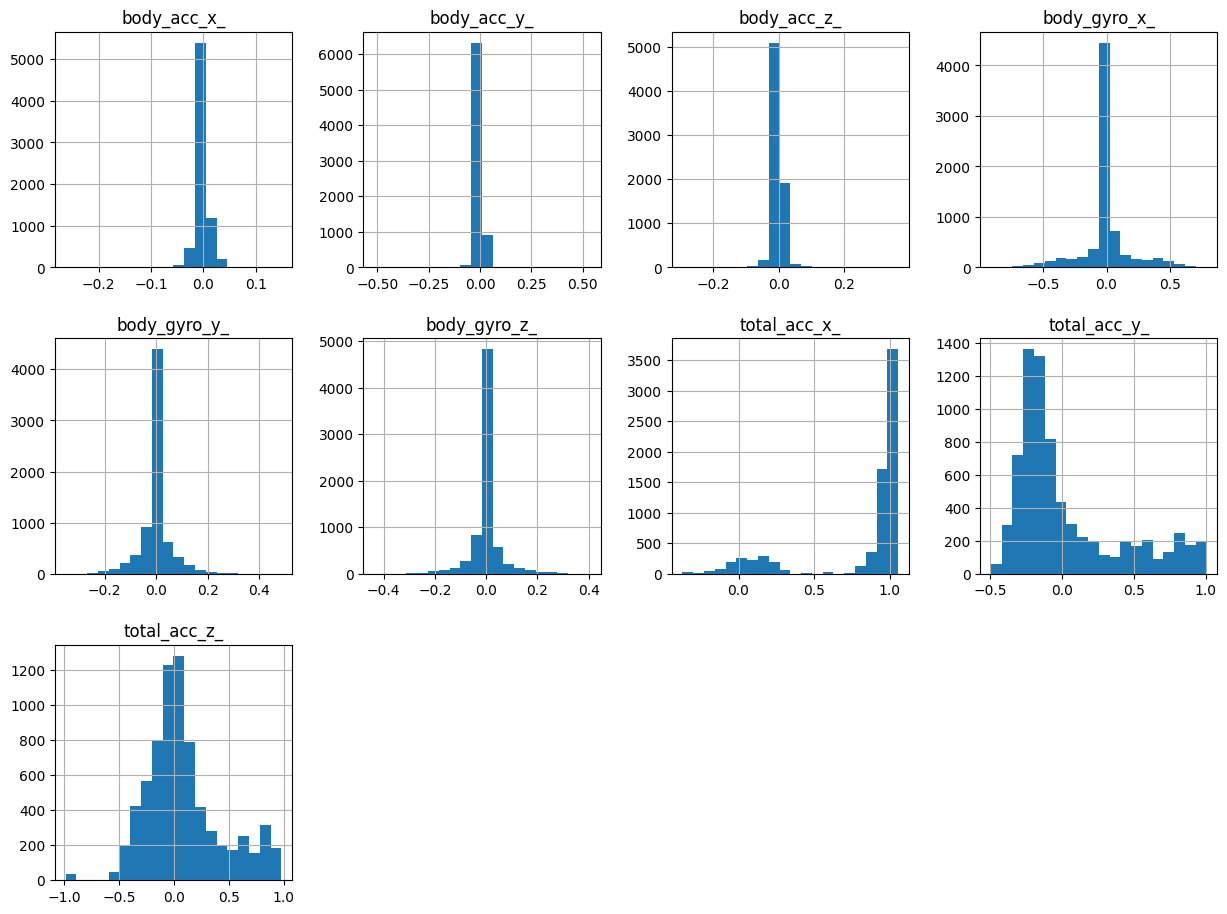

In [47]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

Como se puede apreciar, gran parte de los features concentran su distribución en un promedio cercano a 0, excepto por total_acc_x y total_acc_y, que lo hacen a valores 1.0 y -0.2, respectivamente.

In [56]:
print("Promedios de features:\n", df.mean())
print()
print("Desviaciones estándar de features:\n", df.std())

Promedios de features:
 body_acc_x_    -0.000636
body_acc_y_    -0.000292
body_acc_z_    -0.000275
body_gyro_x_    0.000506
body_gyro_y_   -0.000824
body_gyro_z_    0.000113
total_acc_x_    0.804749
total_acc_y_    0.028755
total_acc_z_    0.086498
dtype: float32

Desviaciones estándar de features:
 body_acc_x_     0.014480
body_acc_y_     0.021406
body_acc_z_     0.018709
body_gyro_x_    0.187867
body_gyro_y_    0.059768
body_gyro_z_    0.061655
total_acc_x_    0.366131
total_acc_y_    0.372431
total_acc_z_    0.342719
dtype: float32


Boxplots por cada feature del dataframe:

body_acc_x_        Axes(0.125,0.747241;0.133621x0.132759)
body_acc_y_     Axes(0.285345,0.747241;0.133621x0.132759)
body_acc_z_      Axes(0.44569,0.747241;0.133621x0.132759)
body_gyro_x_    Axes(0.606034,0.747241;0.133621x0.132759)
body_gyro_y_    Axes(0.766379,0.747241;0.133621x0.132759)
body_gyro_z_       Axes(0.125,0.587931;0.133621x0.132759)
total_acc_x_    Axes(0.285345,0.587931;0.133621x0.132759)
total_acc_y_     Axes(0.44569,0.587931;0.133621x0.132759)
total_acc_z_    Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

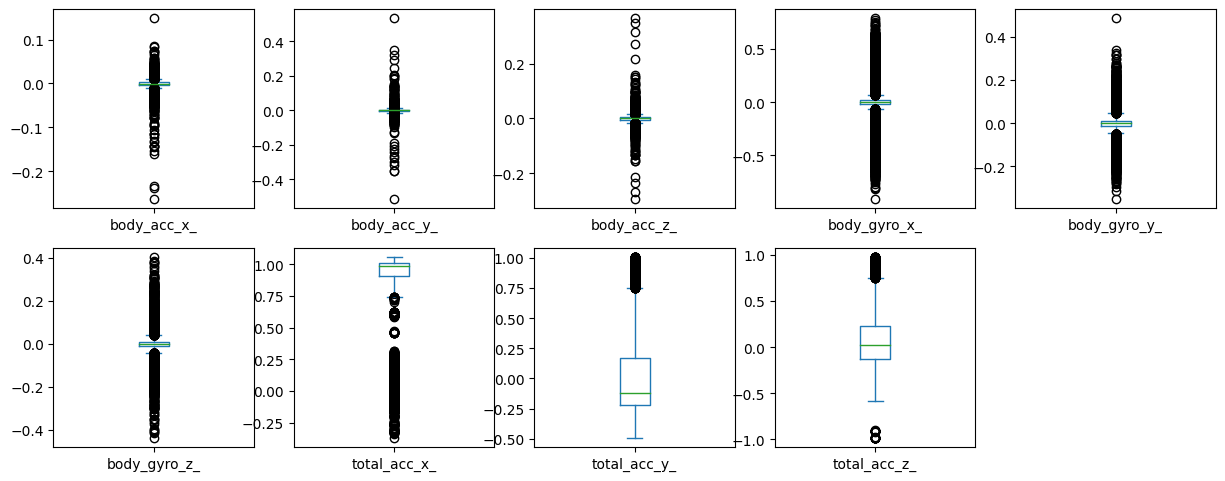

In [48]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Podemos observar de que existe un alto número de outliers en cada uno de los features. Sin embargo, no podríamos considerarlos directamente a estos datos como outliers, pues es altamente probable de que esta alta varianza se deba principalmente a la naturaleza misma de los datos.

Mapa de calor con las correlaciones entre features:

<Axes: >

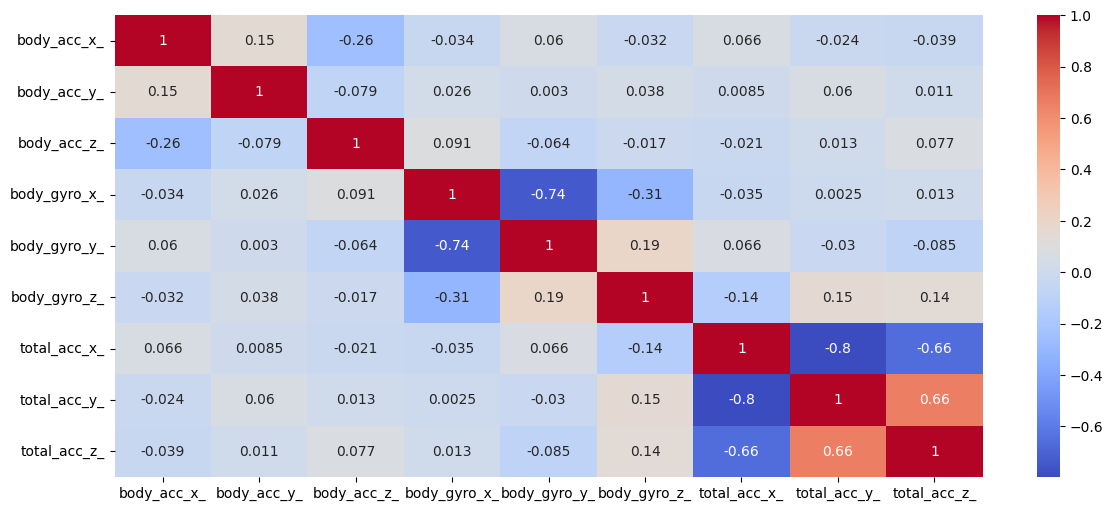

In [49]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

Inmediatamente se pueden destacar las fuertes correlaciones entre las features relacionadas a la aceleración total a lo largo de los 3 índices espaciales. Esto puede deberse a a naturaleza de los movimientos que se realizaron en los experimentos, probablmente siguiendo algún patrón que incluía a estas 3 aceleraciones. También se puede destacar la alta correlación entre las coordenadas del giroscopio en x e y, lo que se podría explicar de la misma forma que lo anterior.

d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

>Dado que la librería permite solo dos dimensiones, y hay 9 archivos con 7352 filas y 128 columnas, lo que se hace es cambiar las dimensiones a 7352x1152, unificando las features de los 9 archivos en uno solo array.

e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

>Para modificar las dimensiones se debe utilizar reshape. Como primer parámetro se entrega la cantidad del conjunto de train (7352) o test (2947) y como segundo la múltiplicación de signal_len (128) y sensor (9):

In [57]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [58]:
x_train.shape

(7352, 1152)

f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

> Los atributos son los mismos, sin embargo se unieron los atributos de los 9 archivos en una sola fila. Esto se puede comprobar con la primera medición, ya que los primeros valores son los del archivo 1 y los últimos valores son los del archivo 9 para esa determinada medición:



In [59]:
x_train[0]

array([0.00018085, 0.01013856, 0.00927557, ..., 0.1003852 , 0.09987355,
       0.09498741], dtype=float32)

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [60]:
onehot_encoder = OneHotEncoder(sparse=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


c:\Users\bruno\u\apr automatico\Tarea2\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Se puede observar la correcta aplicacion de One Hot Encoder:

In [61]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

b) ¿Estan bien balanceadas las clases?

> Considerando los gráfico. Se puede observar que las clases no estan completamente balanceadas, tanto en el conjunto de test como train hay diferencias significativas para la clase 3 y 2 en comparación a las otras.

> Gráfico de las clases para el conjunto de train:



<Axes: ylabel='count'>

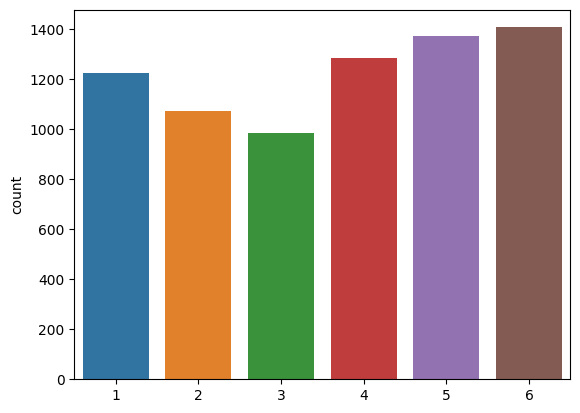

In [62]:
sns.countplot(x=y_train)

Gráfico de las clases para el conjunto de test:

<Axes: ylabel='count'>

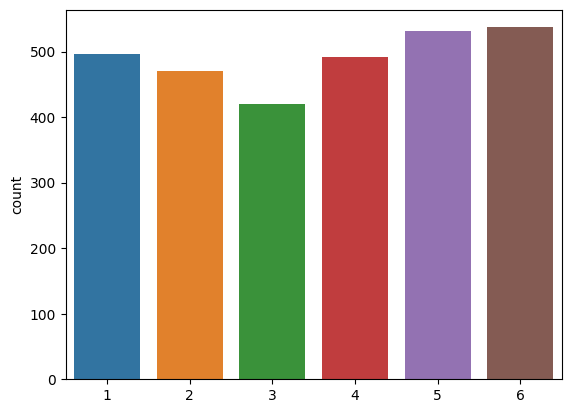

In [63]:
sns.countplot(x=y_test)

Cantidad de las clases:

In [64]:
counter_train = collections.Counter(y_train)
counter_test = collections.Counter(y_test)
print("Valores de train:",counter_train)
print("Valores de test:",counter_test)

Valores de train: Counter({6: 1407, 5: 1374, 4: 1286, 1: 1226, 2: 1073, 3: 986})
Valores de test: Counter({6: 537, 5: 532, 1: 496, 4: 491, 2: 471, 3: 420})


c) Estandarice los atributos con media 0 y variaza 1.

> Utilizando StandardScaler de sklearn para las features del conjunto de entrenamiento y test:

In [65]:
# Create a StandardScaler object
scaler = StandardScaler()


# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales


a) ¿Cómo se entrena una red neuronal feedforward?
>Es una red neuronal simple, en donde la información fluye en un sentido y no hay ciclos. Se entrena con una capa inicial, capa escondida (una o más) y capa de salida con funciones de activación, siempre con flujo en un solo sentido.

b) ¿Qué es una neurona en este contexto?
>Es una función matemática lineal o no lineal, que obtiene como inputs una combinacion lineal de los pesos y salidas de la capa anterior considerando un bias. El output es la transformación asociada al input recibido.

c) ¿Qué es una función de activación y para que sirven?
>La función de activación sirve para realizar una transformación al input dado. Dentro de sus utilidades pueden ser activar o desactivar neuronas, como en la funcioón RELU.

d) ¿A qué se le llama capa densa?
>Es una capa simple de neuronas en la que cada neurona recibe información de todas las neuronas de la capa anterior.

e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?
>Considerando capas densas, sería multiplicar la cantidad de neuronas de cada capa con la cantidad de neuronas de la capa anterior. Por ejemplo, considerando dos hidden layers, sería múltiplicar la cantidad de neuronas de la primera hidden layer con la dimensión de entrada, luego multiplicar la cantidad de neuronas de la segunda hidden layer con la cantidad de neuronas de la primera hidden layer, finalmente multiplicar la cantidad de neuronas de la segunda hidden layer con la dimension de salida.


f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?
>Este problema se produce porque el gradiente de las capas posteriores es la multiplicación del gradiente de las capas anteriores. El gradiente desvaneciente se produce cuando los pesos son menores a 1 y términa disminuyendo bastante en cada capa su valor. En contraparte, el gradiente explosivo se produce cuando los pesos son muy grandes y términa aumentando bastante en cada capa posterior.

g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?
>La capa de salida debe tener 6 nodos, cada uno representando una clase.

h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

Modelo 1 de red neuronal:
<br>
>input_layer -> output_layer:

In [66]:
## model 1
input_layer = Input(shape = (x_train.shape[1:]))
output_layer = Dense(units=6, activation='softmax')(input_layer)
ANN_1 = Model(inputs = input_layer , outputs = output_layer)
ANN_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense (Dense)               (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________


Modelo 2 de red neuronal:
<br>
> input_layer -> hidden_layer(32, tanh) -> output_layer

In [67]:
## model 2
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation='tanh')(input_layer)
output_layer = Dense(units=6, activation='softmax')(layer_1)
ANN_2 = Model(inputs = input_layer , outputs = output_layer)
ANN_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                36896     
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


Modelo 3 de red neuronal:
<br>
> input_layer -> hidden_layer(32, sigmoid) -> output_layer

In [68]:
## model 3
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation='sigmoid')(input_layer)
output_layer = Dense(units=6, activation='softmax')(layer_1)
ANN_3 = Model(inputs = input_layer , outputs = output_layer)
ANN_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_3 (Dense)             (None, 32)                36896     
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


Modelo 4 de red neuronal:
<br>
> input_layer -> hidden_layer(32, relu) -> output_layer

In [69]:
## model 4
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=32, activation='relu')(input_layer)
output_layer = Dense(units=6, activation='softmax')(layer_1)
ANN_4 = Model(inputs = input_layer , outputs = output_layer)
ANN_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_5 (Dense)             (None, 32)                36896     
                                                                 
 dense_6 (Dense)             (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

>Considerando la múltiplicación mencionada en e) y sumando los parámetros de bias, tenemos los siguientes resultados:

> * Modelo1 -> (1152*6 +6) = 6918.
> * Modelo2,3,4 -> (1152 * 32 + 32) + (32 * 6 + 6) = 37094.


 j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

>Se debe monitorear el error de entrenamiento y validación para saber si el modelo esta generalizando correctamente. Se puede detener el entrenamiento cuando la funcion de perdida comienza aumentar o bien el acurracy comienza a disminuir.

¿Qué es la paciencia en este contexto?
> Es el número de epochs sin mejora hasta que se detenga el entrenamiento.

¿Para qué se usa el parámetro min_delta?
>Mínimo cambio requerido en la cantidad monitoreada para ser considerado como una mejora.


A continuación se define el callback de Early Stopping utilizando como monitor _validation loss_ y 50 de paciencia:

In [70]:
early_stop = EarlyStopping(monitor='val_loss',mode='max', verbose=1, patience=50)

k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

¿Qúe función de pérdida se debe usar para este problema (loss)?
> Considerando que es un problema de clasificación con más de dos clases, se utiliza reprentación one hot y cada clase tiene una probabilidad asociada, se considera adecuado utilizar categorical Crossentropy como función de pérdida.

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

Se utiliza como optimizador el gradiente descente estocástico y la métrica _categorical_crossentropy_ para las 4 redes neuronales:

In [71]:
ANN_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_4.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?
>Es la cantidad de datos utilizados en cada iteración para entrenar la red y actualizar sus parámetros.

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

Entrenamiento para el modelo 1:

In [72]:
history_1 = ANN_1.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 14ms/step - loss: 1.6010 - categorical_accuracy: 0.4477 - val_loss: 1.3796 - val_categorical_accuracy: 0.5543
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 1.2667 - categorical_accuracy: 0.5540 - val_loss: 1.2526 - val_categorical_accuracy: 0.5598
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 1.1592 - categorical_accuracy: 0.5833 - val_loss: 1.1945 - val_categorical_accuracy: 0.5611
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0969 - categorical_accuracy: 0.5910 - val_loss: 1.1493 - val_categorical_accuracy: 0.5747
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0548 - categorical_accuracy: 0.6031 - val_loss: 1.1334 - val_categorical_accuracy: 0.5639
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 1.0253 - categorical_accuracy: 0.6078 - val_loss: 1.1215 - val_categorical_accuracy: 0.5584
Epoch 7/100
26/26 [==

Entrenamiento para el modelo 2:

In [73]:
history_2 = ANN_2.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 16ms/step - loss: 1.4573 - categorical_accuracy: 0.4776 - val_loss: 1.2912 - val_categorical_accuracy: 0.5543
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.1608 - categorical_accuracy: 0.5922 - val_loss: 1.1766 - val_categorical_accuracy: 0.5394
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0566 - categorical_accuracy: 0.6131 - val_loss: 1.1143 - val_categorical_accuracy: 0.5503
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 0.9892 - categorical_accuracy: 0.6317 - val_loss: 1.0666 - val_categorical_accuracy: 0.5734
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9368 - categorical_accuracy: 0.6472 - val_loss: 1.0272 - val_categorical_accuracy: 0.5978
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.8935 - categorical_accuracy: 0.6663 - val_loss: 0.9918 - val_categorical_accuracy: 0.6046
Epoch 7/100
26/26 [==

Entrenamiento para el modelo 3:

In [74]:
history_3 = ANN_3.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 12ms/step - loss: 1.8013 - categorical_accuracy: 0.2485 - val_loss: 1.5878 - val_categorical_accuracy: 0.3274
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.5342 - categorical_accuracy: 0.3176 - val_loss: 1.4570 - val_categorical_accuracy: 0.3587
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.4258 - categorical_accuracy: 0.4013 - val_loss: 1.3838 - val_categorical_accuracy: 0.4932
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3591 - categorical_accuracy: 0.4891 - val_loss: 1.3352 - val_categorical_accuracy: 0.5557
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3118 - categorical_accuracy: 0.5308 - val_loss: 1.3001 - val_categorical_accuracy: 0.5367
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 1.2758 - categorical_accuracy: 0.5508 - val_loss: 1.2727 - val_categorical_accuracy: 0.5516
Epoch 7/100
26/26 [==

Entrenamiento para el modelo 4:

In [75]:
history_4 = ANN_4.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 13ms/step - loss: 1.5758 - categorical_accuracy: 0.3901 - val_loss: 1.3211 - val_categorical_accuracy: 0.5693
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.1892 - categorical_accuracy: 0.6061 - val_loss: 1.0854 - val_categorical_accuracy: 0.6196
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9920 - categorical_accuracy: 0.6770 - val_loss: 0.9314 - val_categorical_accuracy: 0.6698
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.8595 - categorical_accuracy: 0.7207 - val_loss: 0.8224 - val_categorical_accuracy: 0.6943
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.7653 - categorical_accuracy: 0.7509 - val_loss: 0.7486 - val_categorical_accuracy: 0.7133
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6934 - categorical_accuracy: 0.7737 - val_loss: 0.6910 - val_categorical_accuracy: 0.7337
Epoch 7/100
26/26 [==

m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

De los resultados anteriores se puede observar que el mejor modelo es el 4, haciendo uso de la función de activación _RELU_ , obteniendo los accuracy más altos y menor valor de perdida. Por tanto lo útilizaremos para crear los siguientes modelos:

Modelo 1:
<br>
> input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [76]:
#Modelo 1
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=64, activation='relu')(input_layer)
layer_2 = Dense(units=32, activation='relu')(layer_1)
output_layer = Dense(units=6, activation='softmax')(layer_2)

ANN_best_1 = Model(inputs = input_layer , outputs = output_layer)
ANN_best_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_7 (Dense)             (None, 64)                73792     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 6)                 198       
                                                                 
Total params: 76,070
Trainable params: 76,070
Non-trainable params: 0
_________________________________________________________________


Modelo 2:
<br>
> input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [77]:
#Modelo 2
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=128, activation='relu')(input_layer)
layer_2 = Dense(units=64, activation='relu')(layer_1)
layer_3 = Dense(units=32, activation='relu')(layer_2)
output_layer = Dense(units=6, activation='softmax')(layer_3)

ANN_best_2 = Model(inputs = input_layer , outputs = output_layer)
ANN_best_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_10 (Dense)            (None, 128)               147584    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 6)                 198       
                                                                 
Total params: 158,118
Trainable params: 158,118
Non-trainable params: 0
_________________________________________________________________


Modelo 3:
<br>
> input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [78]:
#Modelo 3
input_layer = Input(shape = (x_train.shape[1:]))
layer_1 = Dense(units=256, activation='relu')(input_layer)
layer_2 = Dense(units=128, activation='relu')(layer_1)
layer_3 = Dense(units=64, activation='relu')(layer_2)
layer_4 = Dense(units=32, activation='relu')(layer_3)
output_layer = Dense(units=6, activation='softmax')(layer_4)

ANN_best_3 = Model(inputs = input_layer , outputs = output_layer)
ANN_best_3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_14 (Dense)            (None, 256)               295168    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 6)                 198       
                                                                 
Total params: 338,598
Trainable params: 338,598
Non-trainab

Tanto para compilar los 3 modelos y entrenarlos, se utilizaron los mismos mismos parámetros del caso anterior:

In [79]:
ANN_best_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_best_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_best_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

Entrenamiento para el modelo 1:

In [80]:
history_best_1 = ANN_best_1.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 13ms/step - loss: 1.4423 - categorical_accuracy: 0.3759 - val_loss: 1.2503 - val_categorical_accuracy: 0.4755
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1557 - categorical_accuracy: 0.6070 - val_loss: 1.0798 - val_categorical_accuracy: 0.6576
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0069 - categorical_accuracy: 0.6731 - val_loss: 0.9591 - val_categorical_accuracy: 0.6984
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.8914 - categorical_accuracy: 0.7065 - val_loss: 0.8611 - val_categorical_accuracy: 0.7215
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.7949 - categorical_accuracy: 0.7340 - val_loss: 0.7820 - val_categorical_accuracy: 0.7378
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.7139 - categorical_accuracy: 0.7551 - val_loss: 0.7156 - val_categorical_accuracy: 0.7486
Epoch 7/100
26/26 [==

Entrenamiento para el modelo 2:

In [81]:
history_best_2 = ANN_best_2.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 16ms/step - loss: 1.6465 - categorical_accuracy: 0.3354 - val_loss: 1.4082 - val_categorical_accuracy: 0.4742
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 1.2999 - categorical_accuracy: 0.5326 - val_loss: 1.1911 - val_categorical_accuracy: 0.5584
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 1.1175 - categorical_accuracy: 0.6440 - val_loss: 1.0465 - val_categorical_accuracy: 0.6359
Epoch 4/100
26/26 [==============================] - 0s 11ms/step - loss: 0.9812 - categorical_accuracy: 0.7118 - val_loss: 0.9379 - val_categorical_accuracy: 0.6726
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 0.8694 - categorical_accuracy: 0.7535 - val_loss: 0.8461 - val_categorical_accuracy: 0.7228
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7745 - categorical_accuracy: 0.7861 - val_loss: 0.7736 - val_categorical_accuracy: 0.7446
Epoch 7/100
26/26 [=

Entrenamiento para el modelo 3:

In [82]:
history_best_3 = ANN_best_3.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 1s 21ms/step - loss: 1.4888 - categorical_accuracy: 0.3277 - val_loss: 1.2837 - val_categorical_accuracy: 0.4375
Epoch 2/100
26/26 [==============================] - 0s 14ms/step - loss: 1.2326 - categorical_accuracy: 0.4952 - val_loss: 1.1487 - val_categorical_accuracy: 0.6141
Epoch 3/100
26/26 [==============================] - 0s 14ms/step - loss: 1.1032 - categorical_accuracy: 0.6289 - val_loss: 1.0318 - val_categorical_accuracy: 0.7024
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: 0.9832 - categorical_accuracy: 0.6969 - val_loss: 0.9221 - val_categorical_accuracy: 0.7228
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 0.8682 - categorical_accuracy: 0.7388 - val_loss: 0.8247 - val_categorical_accuracy: 0.7514
Epoch 6/100
26/26 [==============================] - 0s 14ms/step - loss: 0.7628 - categorical_accuracy: 0.7706 - val_loss: 0.7370 - val_categorical_accuracy: 0.7745
Epoch 7/100
26/2

n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

En base a las métricas de 'loss' y 'val_loss' entregadas al momento de entrenar, se muestran los siguientes gráficos dependiendo del modelo de la red neuronal (modelo1, modelo2, modelo3):

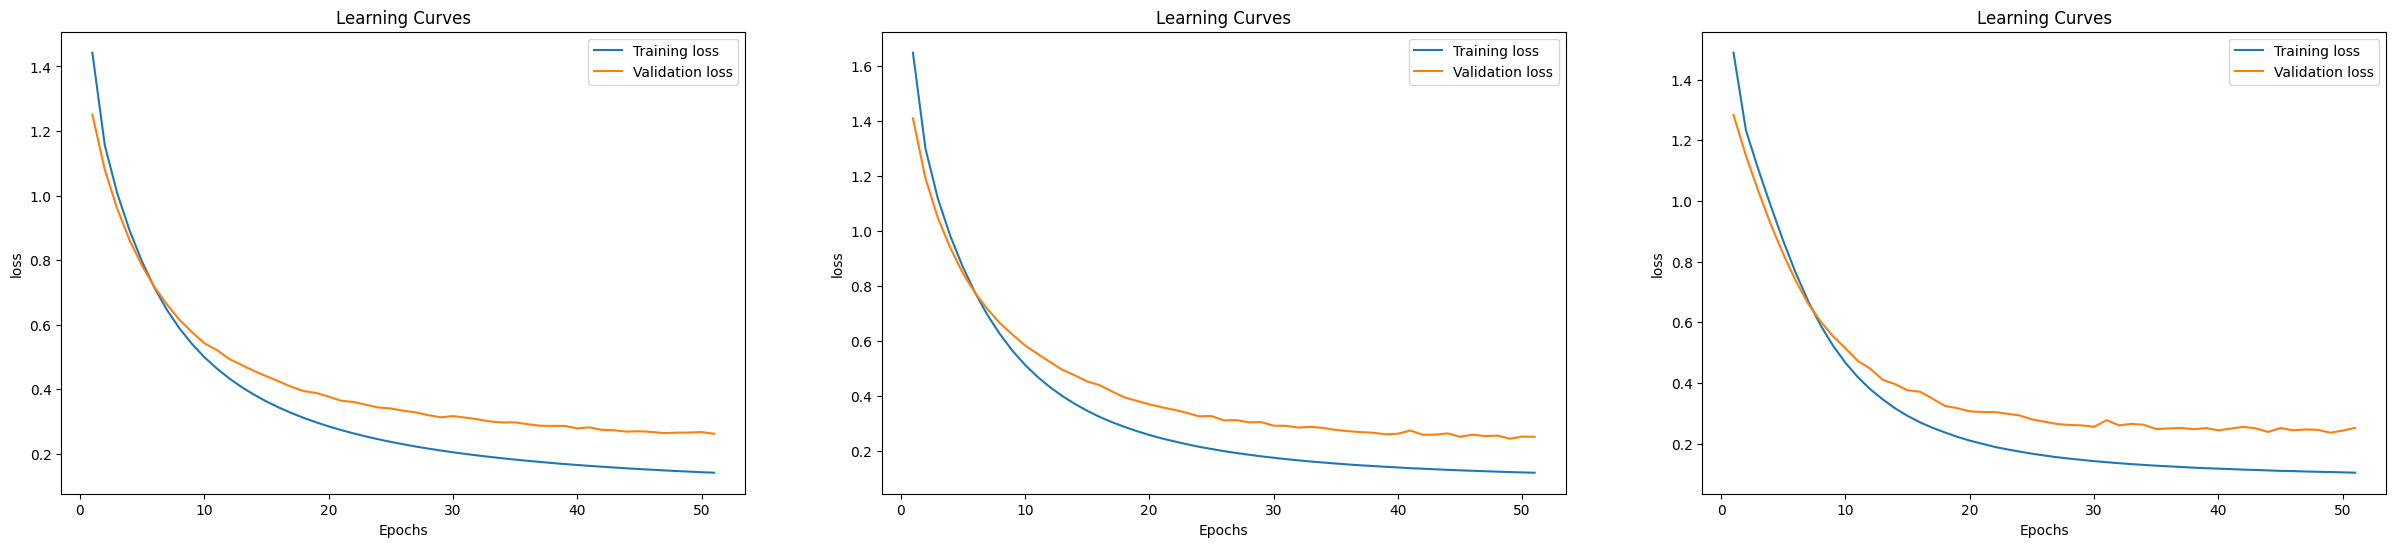

In [83]:
import matplotlib.pyplot as plt

# Access the training and validation errors from the history object
train_errors_1 = history_best_1.history['loss']
val_errors_1 = history_best_1.history['val_loss']
f, axs = plt.subplots(1, 3, figsize=(30, 6))
# Get the number of epochs
epochs = range(1, len(train_errors_1) + 1)
plt.subplot(131)
# Plotting the learning curves
plt.plot(epochs, train_errors_1, label='Training loss')
plt.plot(epochs, val_errors_1, label='Validation loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Learning Curves')
plt.legend()

train_errors_2 = history_best_2.history['loss']
val_errors_2 = history_best_2.history['val_loss']

plt.subplot(132)
# Plotting the learning curves
plt.plot(epochs, train_errors_2, label='Training loss')
plt.plot(epochs, val_errors_2, label='Validation loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Learning Curves')
plt.legend()

train_errors_3 = history_best_3.history['loss']
val_errors_3 = history_best_3.history['val_loss']

plt.subplot(133)
# Plotting the learning curves
plt.plot(epochs, train_errors_3, label='Training loss')
plt.plot(epochs, val_errors_3, label='Validation loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Learning Curves')
plt.legend()
# Displaying the plot
plt.show()

De los gráficos de puede observar una tendencia a underfitting.

o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

En base a los valores obtenidos del accuracy y de la función de perdida, se elige como mejor resultado el modelo el 3. Luego se entrena sobre el conjunto completo sin validatión split:

In [84]:
early_stop = EarlyStopping(monitor='loss',mode='max', verbose=1, patience=50)
history= ANN_best_3.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  callbacks=[early_stop])

Epoch 1/100
13/29 [============>.................] - ETA: 0s - loss: 0.1189 - categorical_accuracy: 0.9555

29/29 [==============================] - 0s 9ms/step - loss: 0.1157 - categorical_accuracy: 0.9563
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: 0.1128 - categorical_accuracy: 0.9569
Epoch 3/100
29/29 [==============================] - 0s 10ms/step - loss: 0.1103 - categorical_accuracy: 0.9578
Epoch 4/100
29/29 [==============================] - 0s 9ms/step - loss: 0.1084 - categorical_accuracy: 0.9587
Epoch 5/100
29/29 [==============================] - 0s 9ms/step - loss: 0.1068 - categorical_accuracy: 0.9600
Epoch 6/100
29/29 [==============================] - 0s 9ms/step - loss: 0.1055 - categorical_accuracy: 0.9589
Epoch 7/100
29/29 [==============================] - 0s 10ms/step - loss: 0.1044 - categorical_accuracy: 0.9608
Epoch 8/100
29/29 [==============================] - 0s 10ms/step - loss: 0.1033 - categorical_accuracy: 0.9597
Epoch 9/100
29/29 [==============================] - 0s 9ms/step - loss: 0.1031 - categorical_accuracy: 0.9600
Epoch 10/

p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

En primer lugar, se deben obtener los valores de la predicción, sin embargo estos al ser continuos se debe aplicar np.argmax y obtener el valor máximo de cada predicción, como se muestra a continuación:

In [85]:
y_pred = ANN_best_3(x_test)
y_pred = np.argmax(y_pred, axis=1)

Posteriormente, quitamos la conversión de One Hot Encoder para la variable y_test:

In [86]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

A continuación se muestra la matriz de confusión, sin embargo hay que considerar que las variables **y_test_comp** con **y_pred** estan considerando desde el valor 0 para la variable target. Debido a que las variables target comienzan desde 1, se deben cambiar los valores aumentando en 1 y para esto se define un arreglo cat que permite realizar esta modificación:

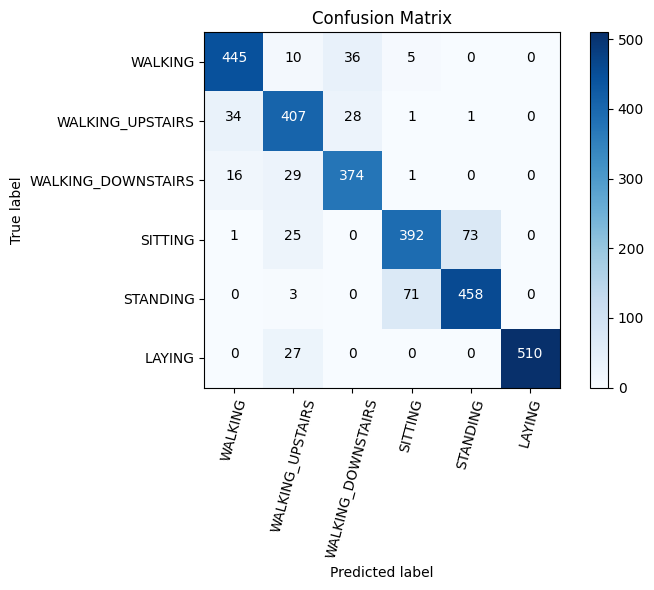

In [87]:

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


Utilizamos classification_report para obtener las métricas del modelo:

In [88]:
cat = np.array([1,2,3,4,5,6])
print(classification_report(cat[y_test_comp], cat[y_pred], target_names=LABELS))

                    precision    recall  f1-score   support

           WALKING       0.90      0.90      0.90       496
  WALKING_UPSTAIRS       0.81      0.86      0.84       471
WALKING_DOWNSTAIRS       0.85      0.89      0.87       420
           SITTING       0.83      0.80      0.82       491
          STANDING       0.86      0.86      0.86       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.88      2947
         macro avg       0.88      0.88      0.88      2947
      weighted avg       0.88      0.88      0.88      2947



q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.
>En base a la matriz de confusión, se puede ver que la red tiene buenos resultados en general. La mejor clase predicta es "Laying", en donde tuvo correcto 510 predicciones de las 537. Si nos fijamos en la métrica f1-score en todos los casos fue sobre 0.8, la mejor fue la clase "LAYING" con 0.97 y la peor "SITTING" con 0.82. También es importante observar que el modelo podría estar confundiendo ciertas clases, como "SITTING" y "STANDING", además de "WALKING_UPSTARIS" y "WALKING DOWNSTAIRS", debido a lo similar que pueden ser los movimientos para realizar estas acciones.

### 2.2.2 AdaBoost y arbustos

a) Describa brevemente como funciona el modelo AdaBoost.
>Es un algoritmo ensamblado similar a random forest, sin embargo, a diferencia de este último es la secuencialidad. AdaBoost crea stumps o árboles de clasificación, en donde asigna un peso a los datos que hayan sido mal clasificados en la primera iteración, para luego ser corregido en la siguiente iteración, además cada stumps tiene mayor peso que otros (valor de "amount of say") en base al trabajo que realiza al momento de aumentar los pesos de los ejemplos mal clasificados.

b) ¿Qué clasificador se puede usar junto con Adaboost?
>Se puede utilizar el clasificador de árboles de decisión, generalmente de max_depth = 1.

c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?
>Es el peso asociado a los clasificadores en cada iteración. Un valor más grande de _learning rate_ aumenta la contribución de los clasificadores en cada iteración al modelo previo. También hay un trade-off entre _learning rate_ y _n\_estimators_, por lo que, a mayor learning rate se requieren menos estimadores.

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



d) Separe el conjunto de entrenamiento dejando el 10% para validación.
<br>

Para separarlo se utiliza train_test_split de sklearn y se le entrega como parametro test_size el 10% perteneciente al conjunto de validación:

In [89]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.10)

e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1.
<BR>

Se utiliza el modelo AdaBoost con parámetro estimator =  _DecisionTreeClassifier_, es decir, utilizar árboles de clasificación como estimadores:

In [90]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [91]:
ada.fit(X_tr, y_tr.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

f) Revise el error de validación con el conjunto de validaión.
<br>

Para obtener los errores de validación en cada iteración del algoritmo, se debe utilizar ada.staged.predict, de esta forma se pueden predecir los valores del conjunto de validación con el primer estimador, luego con el segundo, hasta llegar al estimador 300 o iteración 300:

In [92]:
ada_val_errors = []

for ada_val_predict in ada.staged_predict(X_val):
    ada_val_errors.append(1.0 - accuracy_score( y_val, ada_val_predict))

n_trees_ada = len(ada)

g) Haga la misma prueba pero ahora con 30 estimadores
<br>

Se realiza el mismo proceso, sin embargo, se setea el número de estimadores en 30:

In [93]:
ada2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1
)
ada2.fit(X_tr, y_tr.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=30)

In [94]:
ada_val_errors_2 = []

for ada_val_predict in ada2.staged_predict(X_val):
    ada_val_errors_2.append(1.0 - accuracy_score( y_val, ada_val_predict))

n_trees_ada = len(ada)


h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejor modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.
<br>

Debido a que el modelo es el mismo (sin considerar el número de estimadores), el error de validación no cambia, sin embargo para 30 estimadores itera una menor cantidad de veces y no se puede saber si disminuira el error en proximas iteraciones a diferencia de usar los 300 estimadores. Se decide utilizar 300 estimadores para buscar mejores resultados, aunque se demore más de 10 veces el tiempo de 30 estimadores:

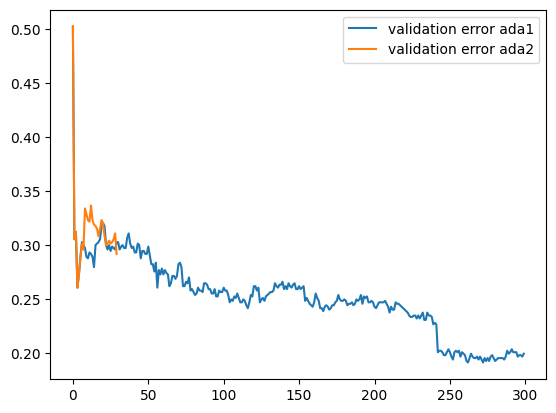

In [95]:
plt.plot(ada_val_errors, label='validation error ada1')
plt.plot(ada_val_errors_2, label='validation error ada2')
plt.legend()
plt.show()

Se entrena el modelo con 300 estimadores y sobre el conjunto completo, sin validación:

In [96]:
ada_best = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)
ada_best.fit(x_train, y_train.ravel())


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

In [97]:
y_pred = ada_best.predict(x_test)

Utilizamos classification_report para obtener las métricas del modelo:

In [98]:
print(classification_report(y_test, y_pred, target_names=LABELS))

                    precision    recall  f1-score   support

           WALKING       0.52      0.80      0.63       496
  WALKING_UPSTAIRS       0.63      0.50      0.56       471
WALKING_DOWNSTAIRS       0.74      0.48      0.58       420
           SITTING       0.86      0.70      0.77       491
          STANDING       0.78      0.89      0.83       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.74      2947
         macro avg       0.76      0.73      0.73      2947
      weighted avg       0.76      0.74      0.74      2947



i) Muestre la matriz de confusión y comente sus resultados.

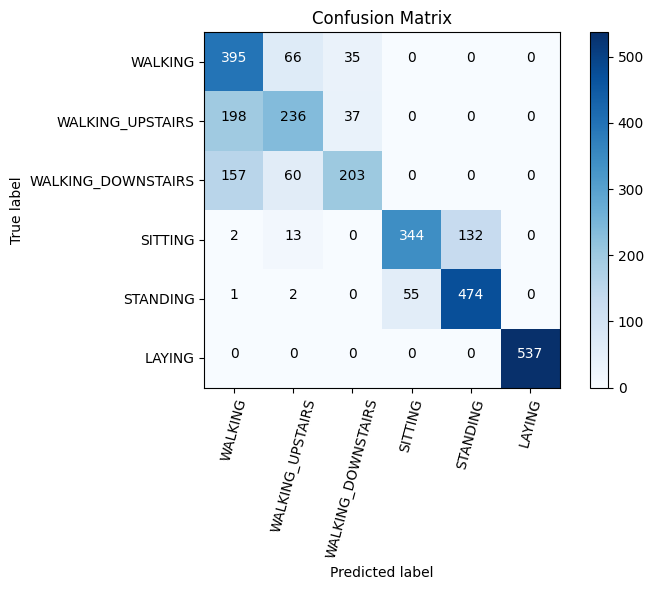

In [99]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
print(classification_report(y_test, y_pred, target_names=LABELS))

                    precision    recall  f1-score   support

           WALKING       0.52      0.80      0.63       496
  WALKING_UPSTAIRS       0.63      0.50      0.56       471
WALKING_DOWNSTAIRS       0.74      0.48      0.58       420
           SITTING       0.86      0.70      0.77       491
          STANDING       0.78      0.89      0.83       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.74      2947
         macro avg       0.76      0.73      0.73      2947
      weighted avg       0.76      0.74      0.74      2947



De la matriz de confusión, se puede observar que el modelo predijo correctamente para todos los casos de la clase "Laying". Utilizando la métrica de f1-score, se obtuvieron los peores resultados para las clases "WALKING_UPSTAIRS" y "WALKING_DOWNSTAIRS" con valor de 0.56 y  0.58 respectivamente. Finalmente, los mejores resultaron fueron con las predicciones de las clases "SITTING"  y "STANDING" con valor de 0.78 y 0.83 respectivamente.<br>
Sucede una situación similar al caso de la red neuronal, en donde el modelo confunde la clasificación de ciertas acciones, en este caso ocurre con "WALKING", "WALKING_UPSTAIRS" y "WALKING_DOWNSTAIRS", además de "SITTING" y "STANDING" al igual que en la red neuronal.

## 2.3 Conclusiones

El modelo de red neuronal con la función de activación RELU obtuvo buenos resultados en general, en donde logro un accuracy de 0.87 y tiempos de ejecución de segundos. Se podrían obtener mejores resultados probando otras funciones de activación y combinaciones de capas ocultas.
<br>
El modelo de adaboost obtuvo un accurracy de 0.74, un valor inferior al modelo de red neuronal. También tuvo tiempos de ejecución superiores, incluso al momento de utilizar 300 estimadores tardo unos 13 minutos. Lo positivo es que al probar con una cantidad de estimadores relativamente pequeña el error disminuyo considerablemente. Este modelo se podría mejorar incluyendo una mayor cantidad de estimadores, en donde el error pueda seguir disminuyendo y encontrando un resultado, además se puede probar con otros estimadores base.

